In [184]:
import cv2
import numpy as np
from numpy.fft import fft2, ifft2, fftshift, ifftshift
from matplotlib import pyplot as plt

In [185]:
def scaleSpectrum(A):
    #another method, have different effect
    #return 20*np.log(np.abs(A))
    return np.real(np.log10(np.absolute(A) + np.ones(A.shape)))

In [186]:
def FFT(img):
    f = fft2(img)
    fshift = fftshift(f)
    return fshift

def invFFT(fimg):
    return ifft2(ifftshift(fimg))

In [187]:
def GaussianFitler(numRows, numCols, sigma, highPass=False):
    """
        Create the (numRows by numCols) Matrix of gaussian filter 

        args:
            numRows: the number of kernal rows  
            numCols: the number of kernal cols
            sigma: simga of 2-d gaussian 
        return:
            filter: guassian kernal matrix 
    """
    
    # the mean of the guassian
    centerX = numRows / 2
    centerY = numCols / 2
    
    # calculate probability of 2-d gaussian in each (i, j) position
    coeff = np.zeros((numRows, numCols))
    for i in range(numRows):
        for j in range(numCols):
            coeff[i][j] = np.exp(-((i - centerX)**2 + (j - centerY)**2) / (2 * sigma**2))
    GS_filter = 1 - coeff if highPass else coeff
    
    return GS_filter 

In [188]:
def idealFitler(numRows, numCols, sigma, highPass=False):
    # the center of the ideafilter
    centerX = numRows / 2
    centerY = numCols / 2
    
    coeff = np.zeros((numRows, numCols))
    
    for i in range(numRows):
        for j in range(numCols):
            D = np.sqrt((i - centerX)**2 + (j - centerY)**2)
            coeff[i][j] = 1 if D < sigma else 0
    idea_filter = (1 - coeff) if highPass else coeff
    
    return idea_filter

In [189]:
def low_pass(lowPassImg, sigma):
    """
        args: 
            lowPassImg: original image will be multiply with low pass filter
            sigma: the sigma used to determine the variance of the filter value
        return:
            the img in frequnce domain after filter
    """
    rows, columns = lowPassImg.shape[0], lowPassImg.shape[1]
    #filter = GaussianFitler(rows, columns, sigma, False)
    filter = idealFitler(rows, columns, sigma, False)
    f_Img = FFT(lowPassImg)

    return f_Img * filter

def high_pass(highPassImg, sigma):
    rows, columns = highPassImg.shape[0], highPassImg.shape[1]
    #filter = GaussianFitler(rows, columns, sigma, True)
    filter = idealFitler(rows, columns, sigma, True)
    f_Img = FFT(highPassImg)

    return f_Img * filter

In [190]:
def hybridImg(highPassImg, lowPassImg, sigmaHigh, sigmaLow):
    highPassed = high_pass(highPassImg, sigmaHigh)
    lowPassed = low_pass(lowPassImg, sigmaLow)
    
    # plot img after filter
    plt.subplot(3, 3, 3)
    plt.title("highPassed img(After filter)[Red channel]")
    plt.imshow(scaleSpectrum(highPassed))
    plt.subplot(3, 3, 6)
    plt.title("lowPassed img(After filter)[Red channel]")
    plt.imshow(scaleSpectrum(lowPassed))

    return np.real(invFFT(highPassed + lowPassed))

D:\Anaconda\lib\site-packages\ipykernel_launcher.py:6: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  
D:\Anaconda\lib\site-packages\ipykernel_launcher.py:9: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  if __name__ == '__main__':
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


True

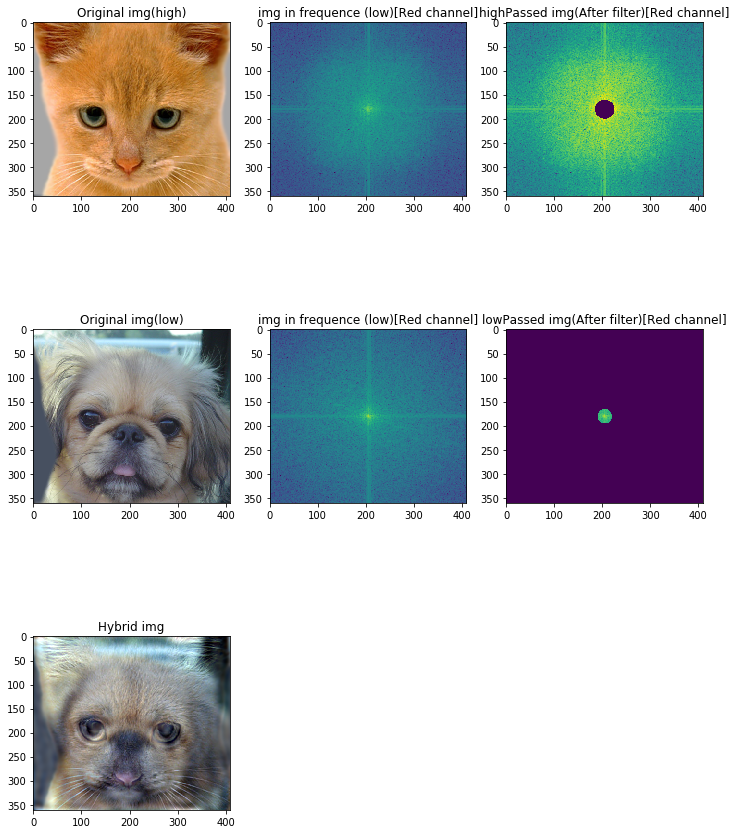

In [191]:
# Set the fileName to read
fileName1 = '3_cat'
fileName2 = '3_dog'
img1 = cv2.imread('hw2_data/task1and2_hybrid_pyramid/' + fileName1 +'.bmp')
img2 = cv2.imread('hw2_data/task1and2_hybrid_pyramid/' + fileName2 +'.bmp')
plt.figure(figsize=(12,16))

# There are two Hyperparameter -> sigmaHigh、sigmaLow
sigmaHigh, sigmaLow = 20, 15
hybrid = np.zeros(img1.shape)
hybrid[:, :, 0] = hybridImg(img1[:,:,0], img2[:,:,0], sigmaHigh, sigmaLow)
hybrid[:, :, 1] = hybridImg(img1[:,:,1], img2[:,:,1], sigmaHigh, sigmaLow)
hybrid[:, :, 2] = hybridImg(img1[:,:,2], img2[:,:,2], sigmaHigh, sigmaLow)

# plot img
plt.subplot(3, 3, 1)
plt.title("Original img(high)")
plt.imshow(img1[:,:,::-1])
plt.subplot(3, 3, 2)
plt.title("img in frequence (low)[Red channel]")
plt.imshow(scaleSpectrum(FFT(img1[:,:,2])))

plt.subplot(3, 3, 4)
plt.title("Original img(low)")
plt.imshow(img2[:,:,::-1])
plt.subplot(3, 3, 5)
plt.title("img in frequence (low)[Red channel]")
plt.imshow(scaleSpectrum(FFT(img2[:,:,2])))

# plt and save Hybrid img
plt.subplot(3, 3, 7)
plt.title("Hybrid img")
hybrid = hybrid.astype(int) # translate to int, otherwise it can't plot proplerly
plt.imshow(hybrid[:,:,::-1])
cv2.imwrite("hybrid_image.jpg",hybrid)